In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv('data/Train.csv',encoding='latin1',parse_dates=['DOB','Lead_Creation_Date'])

In [3]:
#usuwamy kolumne LoggedIn
data.drop(['LoggedIn'],axis=1,inplace=True)

In [4]:
data

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed
0,ID000002C20,Female,Delhi,20000,1978-05-23,2015-05-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,0
1,ID000004E40,Male,Mumbai,35000,1985-10-07,2015-05-04,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,2.0,13.25,NaN,6762.90,N,Web-browser,G,S122,3,0
2,ID000007H20,Male,Panchkula,22500,1981-10-10,2015-05-19,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,4.0,NaN,NaN,NaN,N,Web-browser,B,S143,1,0
3,ID000008I30,Male,Saharsa,35000,1987-11-30,2015-05-09,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,5.0,NaN,NaN,NaN,N,Web-browser,B,S143,3,0
4,ID000009J40,Male,Bengaluru,100000,1984-02-17,2015-05-20,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,2.0,NaN,NaN,NaN,N,Web-browser,B,S134,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87015,ID124813N30,Female,Ajmer,71901,2069-11-27,2015-07-31,1000000.0,5.0,14500.0,MAYO COLLEGE,...,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,3,0
87016,ID124814O40,Female,Kochi,16000,1990-12-01,2015-07-31,0.0,0.0,0.0,KERALA COMMUNICATORS CABLE LTD,...,4.0,35.50,4800.0,9425.76,Y,Mobile,G,S122,5,0
87017,ID124816Q10,Male,Bengaluru,118000,1972-01-28,2015-07-31,0.0,0.0,0.0,BANGALORE INSTITUTE OF TECHNOLOGY,...,4.0,NaN,NaN,NaN,N,Mobile,G,S122,3,0
87018,ID124818S30,Male,Bengaluru,98930,1977-04-27,2015-07-31,800000.0,5.0,13660.0,FIRSTSOURCE SOLUTION LTD,...,5.0,NaN,NaN,NaN,N,Web-browser,G,S122,3,0


In [5]:
y = data['Disbursed']
x = data.drop(['Disbursed'],axis=1)

## Analiza danych

In [6]:
#typy zmiennych
x.dtypes

ID                               object
Gender                           object
City                             object
Monthly_Income                    int64
DOB                      datetime64[ns]
Lead_Creation_Date       datetime64[ns]
Loan_Amount_Applied             float64
Loan_Tenure_Applied             float64
Existing_EMI                    float64
Employer_Name                    object
Salary_Account                   object
Mobile_Verified                  object
Var5                              int64
Var1                             object
Loan_Amount_Submitted           float64
Loan_Tenure_Submitted           float64
Interest_Rate                   float64
Processing_Fee                  float64
EMI_Loan_Submitted              float64
Filled_Form                      object
Device_Type                      object
Var2                             object
Source                           object
Var4                              int64
dtype: object

In [7]:
#sprawdzenie ktore kolumny zawieraja NaN-y
x.isna().any()

ID                       False
Gender                   False
City                      True
Monthly_Income           False
DOB                      False
Lead_Creation_Date       False
Loan_Amount_Applied       True
Loan_Tenure_Applied       True
Existing_EMI              True
Employer_Name             True
Salary_Account            True
Mobile_Verified          False
Var5                     False
Var1                     False
Loan_Amount_Submitted     True
Loan_Tenure_Submitted     True
Interest_Rate             True
Processing_Fee            True
EMI_Loan_Submitted        True
Filled_Form              False
Device_Type              False
Var2                     False
Source                   False
Var4                     False
dtype: bool

In [8]:
#sprawdzenie ile Nan-ow w kolumnach
x.isna().sum()


ID                           0
Gender                       0
City                      1003
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied         71
Loan_Tenure_Applied         71
Existing_EMI                71
Employer_Name               71
Salary_Account           11764
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    34613
Loan_Tenure_Submitted    34613
Interest_Rate            59294
Processing_Fee           59600
EMI_Loan_Submitted       59294
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
dtype: int64

In [9]:
#kolumna Gender - zmienna kategoryczna
x['Gender'].value_counts()

Male      49848
Female    37172
Name: Gender, dtype: int64

(array([37172.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 49848.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

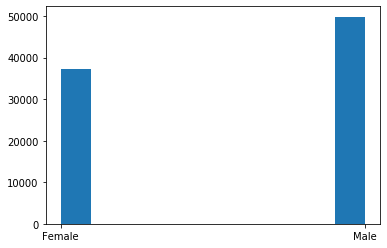

In [10]:
#rozklad zmiennych
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(x['Gender'],bins=10)

In [11]:
#zmienna City - kategoryczna
x['City'].value_counts()

Delhi        12527
Bengaluru    10824
Mumbai       10795
Hyderabad     7272
Chennai       6916
             ...  
DHANDHUKA        1
Raisen           1
Kupwara          1
Dhalai           1
Bandipore        1
Name: City, Length: 697, dtype: int64

In [12]:
#liczba brakujacych danych
x_total = x.shape[0]
x_missing = x['City'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 1.1526085957251206


In [13]:
#rozklad zmiennych
#plt.hist(x[x['City'] == 'Baksa'],bins=10)

In [14]:
#kolumna Monthly income - zmienna numeryczna
x['Monthly_Income'].value_counts()

25000    5823
20000    4523
15000    4246
30000    3216
50000    2392
         ... 
21612       1
58490       1
15521       1
33974       1
36978       1
Name: Monthly_Income, Length: 5825, dtype: int64

In [15]:
x_total = x.shape[0]
x_missing = x['Monthly_Income'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 0.0


In [16]:
#statystyki dla zmiennej 
x['Monthly_Income'].describe()

count    8.702000e+04
mean     5.884997e+04
std      2.177511e+06
min      0.000000e+00
25%      1.650000e+04
50%      2.500000e+04
75%      4.000000e+04
max      4.445544e+08
Name: Monthly_Income, dtype: float64

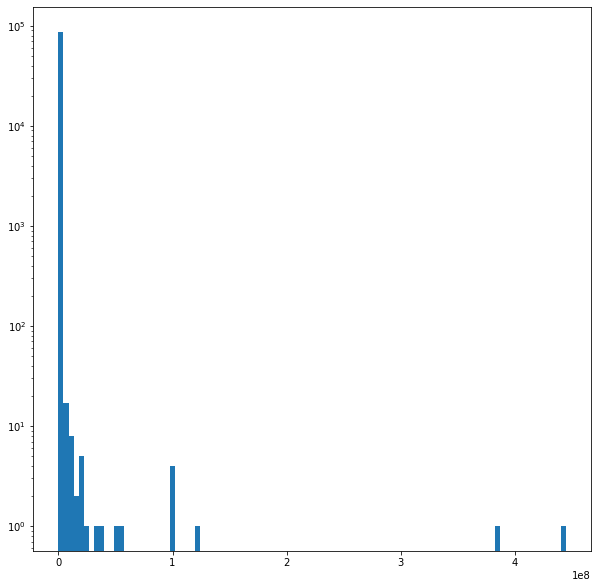

In [17]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['Monthly_Income'],bins=100)
plt.yscale('log')
#plt.xscale('log')

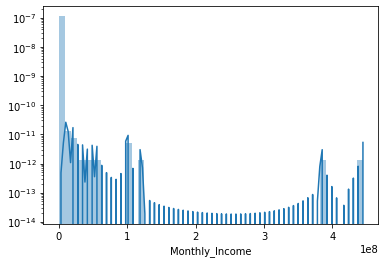

In [18]:
#rozklad zmiennych
import seaborn as sns
sns.distplot(x['Monthly_Income'])
plt.yscale('log')
plt.show()

In [19]:
#rozklad zmiennych po konwersji log()
#aby zrobic konwersje trzeba wartosc 0.0 zamienic na bardzo male 0.000001
#rozklad zmiennych
#x_tmp = x
#x_tmp.loc[x_tmp['Monthly_Income'] == 0] = 0.000001
#plt.figure(figsize=(10,10))
#plt.hist(np.log(x_tmp['Monthly_Income']),bins=100)
#plt.yscale('log')
#plt.xscale('log')

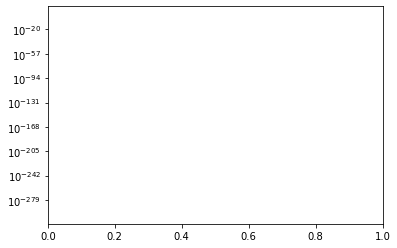

In [20]:
#rozklad zmiennych
import seaborn as sns
#sns.distplot(np.log(x_tmp['Monthly_Income']))
plt.yscale('log')
plt.show()

In [21]:
#zmienna DOB - data
x['DOB'].value_counts()

1980-11-11    306
1970-01-02    226
1970-01-01    148
1990-01-01    131
1980-01-01    111
             ... 
1994-12-09      1
2050-05-20      1
2068-08-25      1
2060-11-30      1
2062-06-24      1
Name: DOB, Length: 11345, dtype: int64

In [22]:
#brakujace wartosci
x_total = x.shape[0]
x_city_missing = x['DOB'].isnull().sum()
print('missing percentage: '+str((x_city_missing/x_total)*100))

missing percentage: 0.0


In [23]:
x['DOB']

0       1978-05-23
1       1985-10-07
2       1981-10-10
3       1987-11-30
4       1984-02-17
           ...    
87015   2069-11-27
87016   1990-12-01
87017   1972-01-28
87018   1977-04-27
87019   1988-10-31
Name: DOB, Length: 87020, dtype: datetime64[ns]

In [24]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
#plt.plot(x['DOB'].year)
#plt.yscale('log')
#plt.xscale('log')

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [25]:
#zmienna Lead Creation Date
x['Lead_Creation_Date'].value_counts()

2015-07-03    2315
2015-07-23    1994
2015-07-30    1297
2015-07-27    1292
2015-07-31    1268
              ... 
2015-05-24     502
2015-05-31     498
2015-07-12     475
2015-05-10     459
2015-06-14     373
Name: Lead_Creation_Date, Length: 92, dtype: int64

In [26]:
#brakujace wartosci
x_total = x.shape[0]
x_missing = x['Lead_Creation_Date'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 0.0


In [27]:
#daty trzeba przerobic
#rozklad zmiennych
plt.figure(figsize=(10,10))
#plt.plot(x['Lead_Creation_Date'].year)
#plt.yscale('log')
#plt.xscale('log')

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [28]:
# zmienna Loan_Amount_Applied numeryczna
x['Loan_Amount_Applied'].value_counts()

0.0          28853
100000.0     14311
200000.0     13058
300000.0      9995
500000.0      9762
             ...  
560000.0         1
475000.0         1
460000.0         1
1405000.0        1
204000.0         1
Name: Loan_Amount_Applied, Length: 277, dtype: int64

In [29]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Loan_Amount_Applied'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 0.08159043897954493


In [30]:
#statystyki dla zmiennej 
x['Loan_Amount_Applied'].describe()

count    8.694900e+04
mean     2.302507e+05
std      3.542068e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+05
75%      3.000000e+05
max      1.000000e+07
Name: Loan_Amount_Applied, dtype: float64

C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


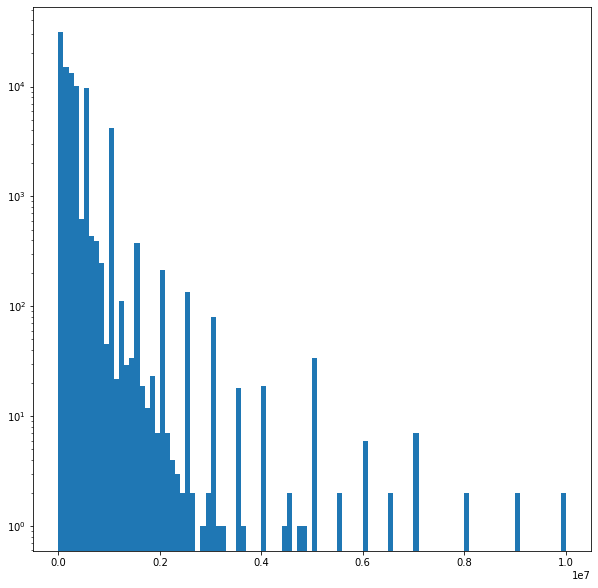

In [31]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['Loan_Amount_Applied'],bins=100)
plt.yscale('log')
#plt.xscale('log')

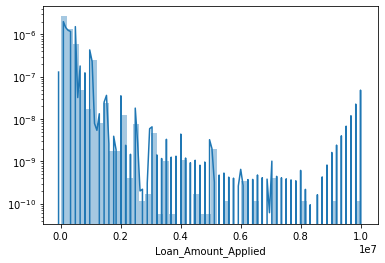

In [32]:
#rozklad zmiennych
import seaborn as sns
sns.distplot(x['Loan_Amount_Applied'])
plt.yscale('log')
plt.show()

In [33]:
# zmienna Loan_Amount_Applied numeryczna
x['Loan_Tenure_Applied'].value_counts()

0.0     33844
5.0     19083
3.0     13080
2.0      9463
4.0      6620
1.0      4812
10.0       40
7.0         3
6.0         2
9.0         1
8.0         1
Name: Loan_Tenure_Applied, dtype: int64

In [34]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Loan_Tenure_Applied'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 0.08159043897954493


In [35]:
#statystyki dla zmiennej 
x['Loan_Tenure_Applied'].describe()

count    86949.000000
mean         2.131399
std          2.014193
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         10.000000
Name: Loan_Tenure_Applied, dtype: float64

C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.3844e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.8120e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.4630e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.3080e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.6200e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.9083e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

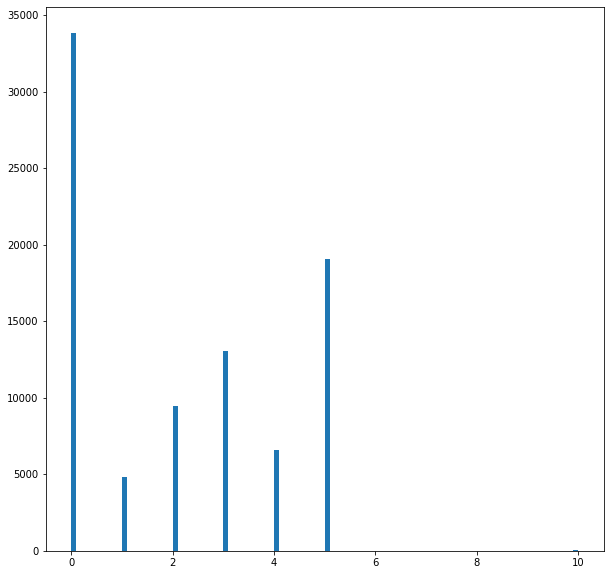

In [36]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['Loan_Tenure_Applied'],bins=100)
#plt.yscale('log')
#plt.xscale('log')

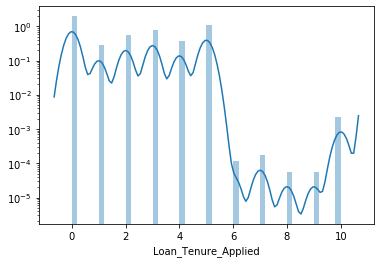

In [37]:
#rozklad zmiennych
import seaborn as sns
sns.distplot(x['Loan_Tenure_Applied'])
plt.yscale('log')
plt.show()

In [38]:
#zmienna Existing_EMI
x['Existing_EMI'].value_counts()

0.0        58238
5000.0      2695
10000.0     1737
3000.0      1581
4000.0      1226
           ...  
11036.0        1
1703.0         1
2335.0         1
2936.0         1
1543.0         1
Name: Existing_EMI, Length: 3753, dtype: int64

In [39]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Existing_EMI'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 0.08159043897954493


In [40]:
#statystyki dla zmiennej 
x['Existing_EMI'].describe()

count    8.694900e+04
mean     3.696228e+03
std      3.981021e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


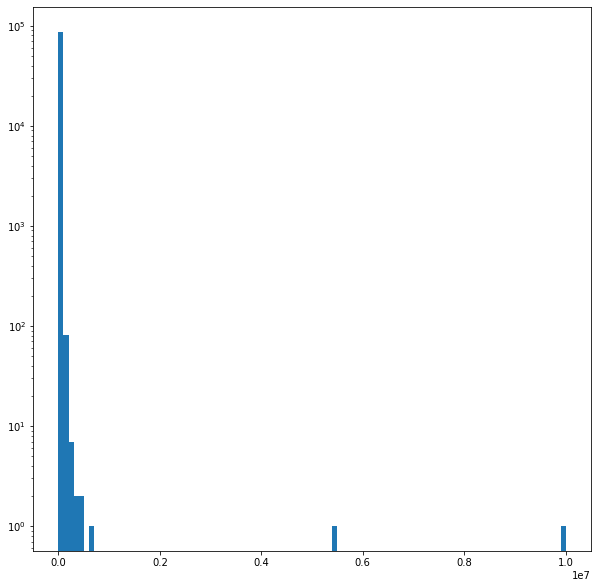

In [41]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['Existing_EMI'],bins=100)
plt.yscale('log')
#plt.xscale('log')

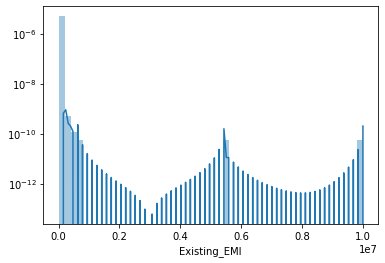

In [42]:
#rozklad zmiennych
import seaborn as sns
sns.distplot(x['Existing_EMI'])
plt.yscale('log')
plt.show()

In [43]:
#zmienna Employer_Name
x['Employer_Name'].value_counts()

0                                               4914
TATA CONSULTANCY SERVICES LTD (TCS)              550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     404
ACCENTURE SERVICES PVT LTD                       324
GOOGLE                                           301
                                                ... 
SALARED                                            1
M.CH.PULLA RAO                                     1
EKTA CHAUHN                                        1
MJ ERECTORS                                        1
KEIHIN FIE PVT LTD                                 1
Name: Employer_Name, Length: 43567, dtype: int64

In [44]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Employer_Name'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 0.08159043897954493


In [45]:
#statystyki dla zmiennej 
x['Employer_Name'].describe()

count     86949
unique    43567
top           0
freq       4914
Name: Employer_Name, dtype: object

In [46]:
#poniewaz w danych istnieja nany
#x['Employer_Name'] = x['Employer_Name'].fillna('na')
#poniewaz nan i nieokreslonych jest <0.82% to mozemy wypelnic most frequent

In [47]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
#plt.hist(x['Employer_Name'],bins=43568)
#plt.yscale('log')
#plt.xscale('log')

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [48]:
#zmienna Employer_Name
x['Salary_Account'].value_counts()

HDFC Bank                                          17695
ICICI Bank                                         13636
State Bank of India                                11843
Axis Bank                                           8783
Citibank                                            2376
Kotak Bank                                          2067
IDBI Bank                                           1550
Punjab National Bank                                1201
Bank of India                                       1170
Bank of Baroda                                      1126
Standard Chartered Bank                              995
Canara Bank                                          990
Union Bank of India                                  951
Yes Bank                                             779
ING Vysya                                            678
Corporation bank                                     649
Indian Overseas Bank                                 612
State Bank of Hyderabad        

In [49]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Salary_Account'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 13.518731326131924


In [50]:
#statystyki dla zmiennej 
x['Salary_Account'].describe()

count         75256
unique           57
top       HDFC Bank
freq          17695
Name: Salary_Account, dtype: object

In [51]:
#poniewaz w danych istnieja nany
x['Salary_Account'] = x['Salary_Account'].fillna('na')

(array([1.7695e+04, 1.3636e+04, 1.1843e+04, 3.2800e+02, 7.7900e+02,
        1.1764e+04, 2.0670e+03, 6.1200e+02, 4.0600e+02, 8.7830e+03,
        4.4500e+02, 9.9500e+02, 4.8500e+02, 1.1700e+03, 5.0300e+02,
        6.4900e+02, 2.3700e+02, 8.3000e+01, 2.3760e+03, 3.2600e+02,
        1.2010e+03, 5.0000e+01, 4.1500e+02, 2.3800e+02, 1.1260e+03,
        9.9000e+02, 5.2400e+02, 2.5200e+02, 5.9700e+02, 1.5500e+03,
        1.7700e+02, 9.5100e+02, 6.7800e+02, 2.5300e+02, 1.8200e+02,
        6.6000e+01, 5.9000e+01, 1.2500e+02, 7.1000e+01, 5.5500e+02,
        1.8300e+02, 1.0800e+02, 3.3100e+02, 1.9500e+02, 2.2700e+02,
        2.0000e+02, 1.6000e+02, 2.5500e+02, 5.0000e+00, 1.8000e+01,
        4.2000e+01, 1.4000e+01, 1.1000e+01, 4.0000e+00, 7.0000e+00,
        8.0000e+00, 8.0000e+00, 2.0000e+00]),
 array([ 0.        ,  0.98275862,  1.96551724,  2.94827586,  3.93103448,
         4.9137931 ,  5.89655172,  6.87931034,  7.86206897,  8.84482759,
         9.82758621, 10.81034483, 11.79310345, 12.77586207, 

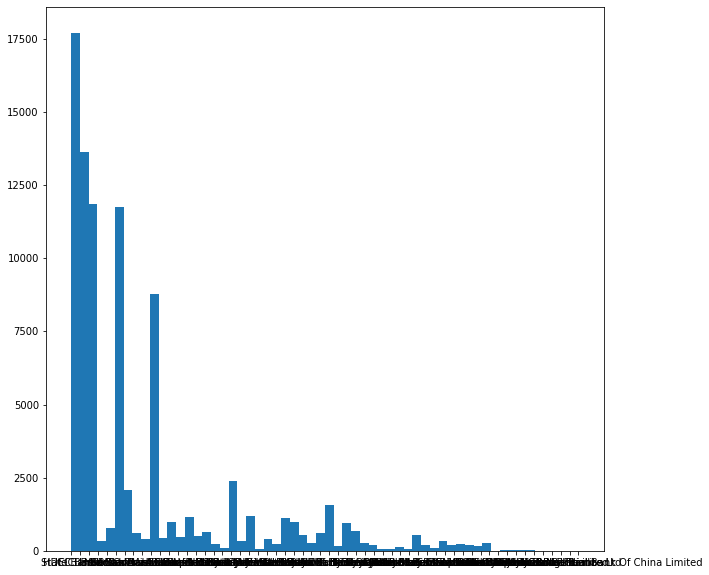

In [52]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['Salary_Account'],bins=58)
#plt.yscale('log')
#plt.xscale('log')

In [53]:
#zmienna Employer_Name
x['Mobile_Verified'].value_counts()

Y    56481
N    30539
Name: Mobile_Verified, dtype: int64

In [54]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Mobile_Verified'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 0.0


In [55]:
#statystyki dla zmiennej 
x['Mobile_Verified'].describe()

count     87020
unique        2
top           Y
freq      56481
Name: Mobile_Verified, dtype: object

(array([30539.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 56481.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

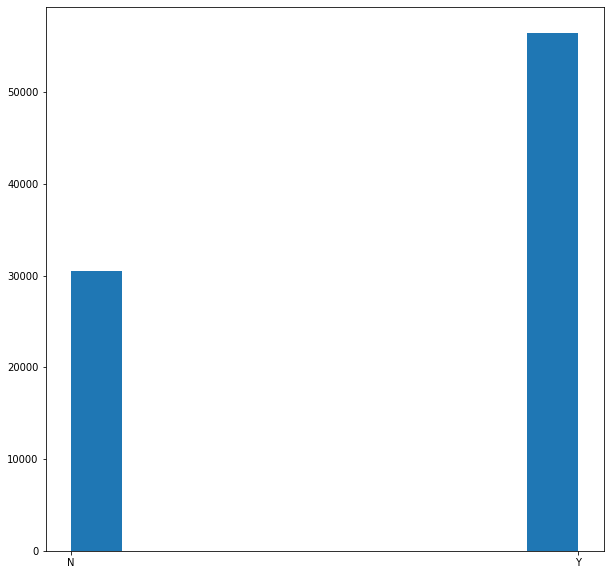

In [56]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['Mobile_Verified'],bins=10)
#plt.yscale('log')
#plt.xscale('log')

In [57]:
#na jest tak mało ze mozemy wypelnic most frequent

In [58]:
#zmienna Var5 ciagla numerczna
x['Var5'].value_counts()

0     29087
1     12236
3      6759
11     5204
2      4485
14     3662
15     3509
12     2989
13     2622
8      2515
10     2427
9      2281
16     2097
4      1815
17     1691
7      1489
6       983
5       975
18      194
Name: Var5, dtype: int64

In [59]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Var5'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 0.0


In [60]:
#statystyki dla zmiennej 
x['Var5'].describe()

count    87020.000000
mean         4.961503
std          5.670385
min          0.000000
25%          0.000000
50%          2.000000
75%         11.000000
max         18.000000
Name: Var5, dtype: float64

(array([29087., 12236.,  4485.,  6759.,  1815.,   975.,   983.,  1489.,
         2515.,     0.,  2281.,  2427.,  5204.,  2989.,  2622.,  3662.,
         3509.,  2097.,  1691.,   194.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ,
         9.9, 10.8, 11.7, 12.6, 13.5, 14.4, 15.3, 16.2, 17.1, 18. ]),
 <a list of 20 Patch objects>)

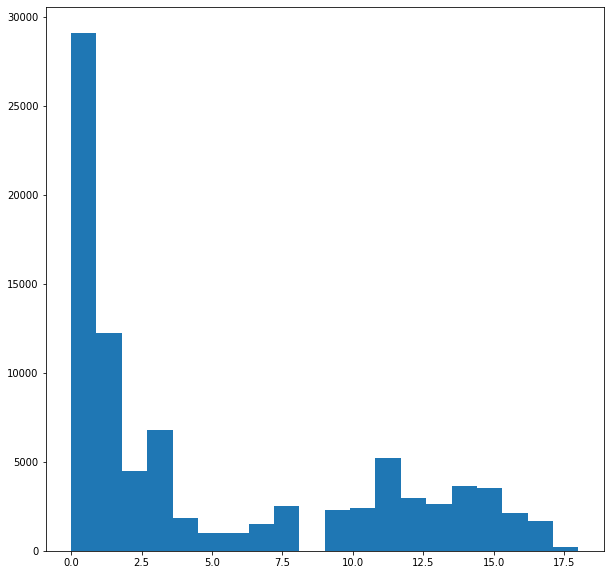

In [61]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['Var5'],bins=20)
#plt.yscale('log')
#plt.xscale('log')

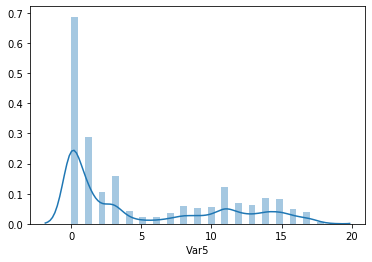

In [62]:
#rozklad zmiennych
import seaborn as sns
sns.distplot(x['Var5'])
#plt.yscale('log')
plt.show()

In [63]:
#zmienna Var1 categorical multiple values
x['Var1'].value_counts()

HBXX    59294
HBXC     9010
HBXB     4479
HAXA     2909
HBXA     2123
HAXB     2011
HBXD     1964
HAXC     1536
HBXH      970
HCXF      722
HAYT      508
HAVC      384
HAXM      268
HCXD      237
HCYS      217
HVYS      186
HAZD      109
HCXG       78
HAXF       15
Name: Var1, dtype: int64

In [64]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Var1'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 0.0


In [65]:
#statystyki dla zmiennej 
x['Var1'].describe()

count     87020
unique       19
top        HBXX
freq      59294
Name: Var1, dtype: object

(array([61417.,  2279., 10974.,  3879.,  4479.,   745.,   570.,   187.,
          939.,  1551.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

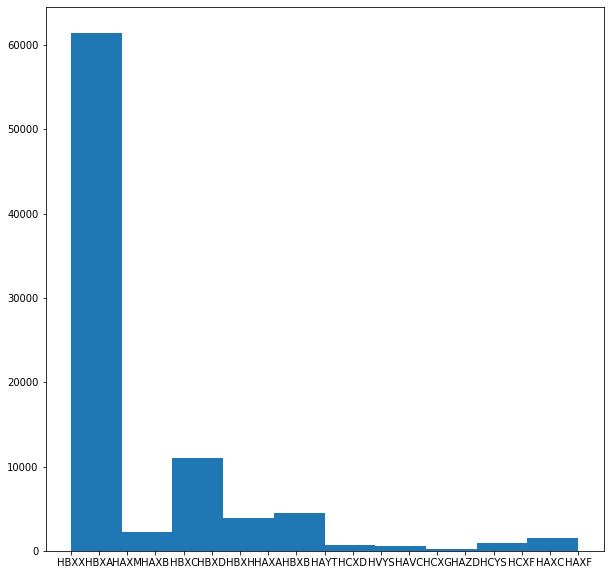

In [66]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['Var1'],bins=10)
#plt.yscale('log')
#plt.xscale('log')

In [67]:
#zmienna Loan_Amount_Submitted
x['Loan_Amount_Submitted'].value_counts()

100000.0     6884
200000.0     6583
300000.0     5385
500000.0     4849
1000000.0    1644
             ... 
2470000.0       1
1660000.0       1
1890000.0       1
1990000.0       1
1900000.0       1
Name: Loan_Amount_Submitted, Length: 203, dtype: int64

In [68]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Loan_Amount_Submitted'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 39.775913583084346


In [69]:
#statystyki dla zmiennej 
x['Loan_Amount_Submitted'].describe()

count    5.240700e+04
mean     3.950106e+05
std      3.082481e+05
min      5.000000e+04
25%      2.000000e+05
50%      3.000000e+05
75%      5.000000e+05
max      3.000000e+06
Name: Loan_Amount_Submitted, dtype: float64

C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\darek\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([8.013e+03, 1.728e+03, 8.448e+03, 2.382e+03, 8.926e+03, 4.353e+03,
        2.718e+03, 6.246e+03, 1.206e+03, 9.280e+02, 8.530e+02, 9.060e+02,
        6.700e+02, 4.850e+02, 4.150e+02, 2.510e+02, 1.815e+03, 1.450e+02,
        1.160e+02, 5.630e+02, 9.700e+01, 5.100e+01, 8.600e+01, 5.100e+01,
        6.850e+02, 1.000e+01, 1.900e+01, 1.300e+01, 9.000e+00, 5.500e+01,
        4.000e+00, 6.000e+00, 6.000e+00, 7.200e+01, 3.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 2.000e+00, 4.900e+01,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 7.000e+00]),
 array([  50000.,  109000.,  168000.,  227000.,  286000.,  345000.,
         404000.,  463000.,  522000.,  581000.,  640000.,  699000.,
         758000.,  817000.,  876000.,  935000.,  994000., 1053000.,
        1112000., 1171000., 1230000., 1289000., 1348000., 1407000.,
        1466000., 1525000., 1584000., 1643000., 1702000., 1761000.,
        1820000., 1879000., 1938000.

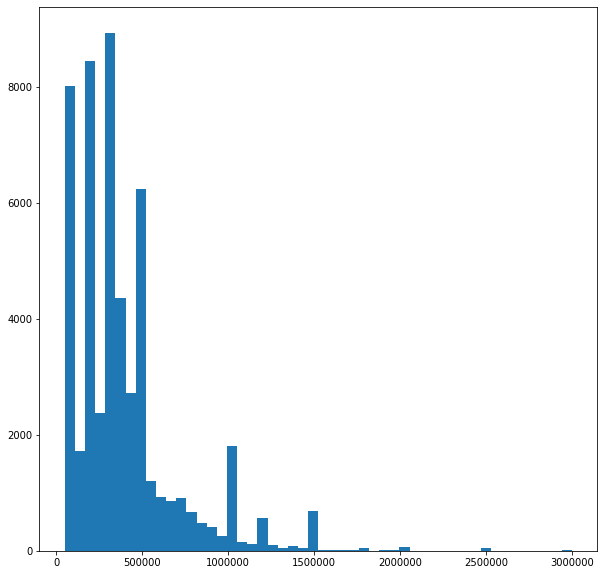

In [70]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['Loan_Amount_Submitted'],bins=50)
#plt.yscale('log')
#plt.xscale('log')

In [71]:
#zmienna Loan_Tenure_Submitted
x['Loan_Tenure_Submitted'].value_counts()

5.0    20765
4.0    15135
3.0     8858
2.0     5332
1.0     2314
6.0        3
Name: Loan_Tenure_Submitted, dtype: int64

In [72]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Loan_Tenure_Submitted'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 39.775913583084346


In [73]:
#statystyki dla zmiennej 
x['Loan_Tenure_Submitted'].describe()

count    52407.000000
mean         3.891369
std          1.165359
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Loan_Tenure_Submitted, dtype: float64

(array([2.3140e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.3320e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        8.8580e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.5135e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0765e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
        3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
        4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. ]),
 <a list of 50 Patch objects>

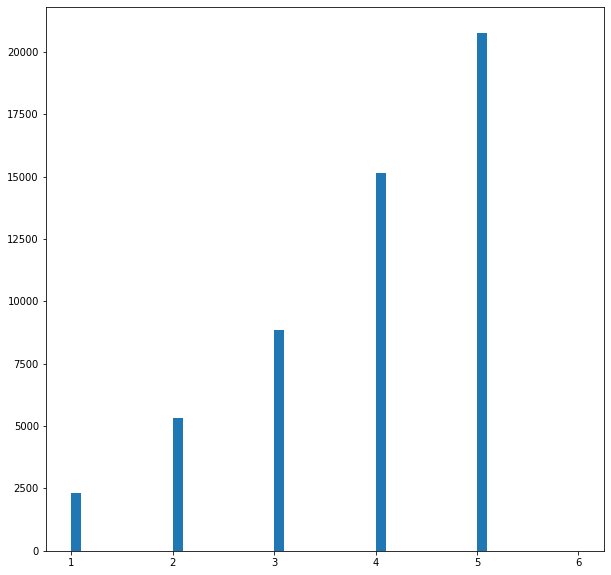

In [74]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['Loan_Tenure_Submitted'],bins=50)
#plt.yscale('log')
#plt.xscale('log')

In [75]:
#zmienna Intrest_Rate
x['Interest_Rate'].value_counts()

20.00    4707
14.85    2016
13.99    1699
31.50    1696
15.25    1553
         ... 
14.55       2
20.50       2
15.60       1
14.29       1
15.15       1
Name: Interest_Rate, Length: 73, dtype: int64

In [76]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Interest_Rate'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 68.13835899793152


In [77]:
#statystyki dla zmiennej 
x['Interest_Rate'].describe()

count    27726.000000
mean        19.197474
std          5.834213
min         11.990000
25%         15.250000
50%         18.000000
75%         20.000000
max         37.000000
Name: Interest_Rate, dtype: float64

(array([9.000e+01, 1.910e+02, 1.022e+03, 2.475e+03, 5.650e+02, 2.381e+03,
        1.808e+03, 1.868e+03, 7.940e+02, 1.633e+03, 4.160e+02, 4.300e+02,
        3.092e+03, 3.150e+02, 6.430e+02, 1.860e+02, 4.707e+03, 2.000e+00,
        0.000e+00, 2.100e+01, 6.600e+01, 0.000e+00, 1.500e+01, 8.400e+01,
        6.490e+02, 1.100e+01, 0.000e+00, 6.500e+01, 0.000e+00, 1.600e+01,
        1.970e+02, 2.600e+01, 6.000e+00, 9.500e+02, 4.600e+01, 2.600e+01,
        0.000e+00, 1.300e+01, 5.600e+01, 1.696e+03, 0.000e+00, 2.120e+02,
        1.580e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.930e+02,
        0.000e+00, 3.020e+02]),
 array([11.99  , 12.4902, 12.9904, 13.4906, 13.9908, 14.491 , 14.9912,
        15.4914, 15.9916, 16.4918, 16.992 , 17.4922, 17.9924, 18.4926,
        18.9928, 19.493 , 19.9932, 20.4934, 20.9936, 21.4938, 21.994 ,
        22.4942, 22.9944, 23.4946, 23.9948, 24.495 , 24.9952, 25.4954,
        25.9956, 26.4958, 26.996 , 27.4962, 27.9964, 28.4966, 28.9968,
        29.497 , 29.9

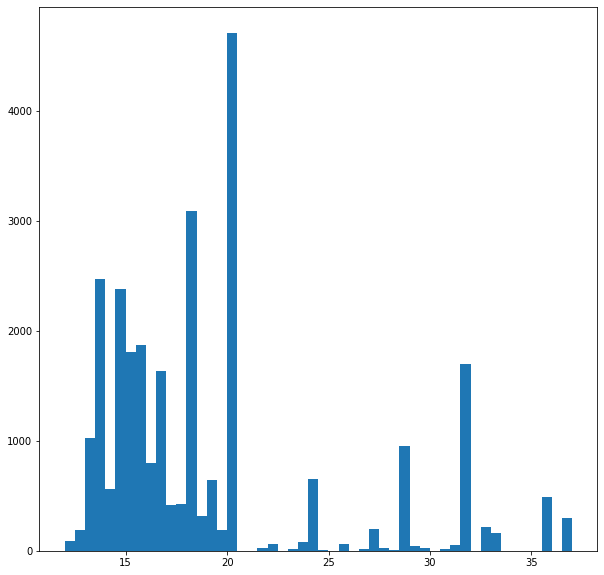

In [78]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['Interest_Rate'],bins=50)
#plt.yscale('log')
#plt.xscale('log')

In [79]:
#zmienna Processing_Fee
x['Processing_Fee'].value_counts()

2000.0     3074
1000.0     2067
4000.0     2006
3000.0     1286
6000.0     1183
           ... 
13464.0       1
3969.0        1
7326.0        1
5920.0        1
9120.0        1
Name: Processing_Fee, Length: 571, dtype: int64

In [80]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Processing_Fee'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 68.49000229832222


In [81]:
#statystyki dla zmiennej 
x['Processing_Fee'].describe()

count    27420.000000
mean      5131.150839
std       4725.837644
min        200.000000
25%       2000.000000
50%       4000.000000
75%       6250.000000
max      50000.000000
Name: Processing_Fee, dtype: float64

(array([2.723e+03, 5.148e+03, 3.687e+03, 4.293e+03, 2.563e+03, 2.021e+03,
        1.164e+03, 1.163e+03, 5.950e+02, 1.501e+03, 3.060e+02, 3.920e+02,
        3.320e+02, 2.060e+02, 2.530e+02, 9.200e+01, 1.220e+02, 1.080e+02,
        1.010e+02, 2.250e+02, 5.100e+01, 2.800e+01, 1.400e+01, 6.500e+01,
        1.800e+01, 1.300e+01, 5.000e+00, 1.300e+01, 5.000e+00, 1.510e+02,
        0.000e+00, 1.000e+00, 2.000e+00, 7.000e+00, 1.000e+00, 2.400e+01,
        0.000e+00, 7.000e+00, 1.000e+00, 1.500e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00]),
 array([  200.,  1196.,  2192.,  3188.,  4184.,  5180.,  6176.,  7172.,
         8168.,  9164., 10160., 11156., 12152., 13148., 14144., 15140.,
        16136., 17132., 18128., 19124., 20120., 21116., 22112., 23108.,
        24104., 25100., 26096., 27092., 28088., 29084., 30080., 31076.,
        32072., 33068., 34064., 35060., 36056., 37052., 38048., 39044.,
        40040., 

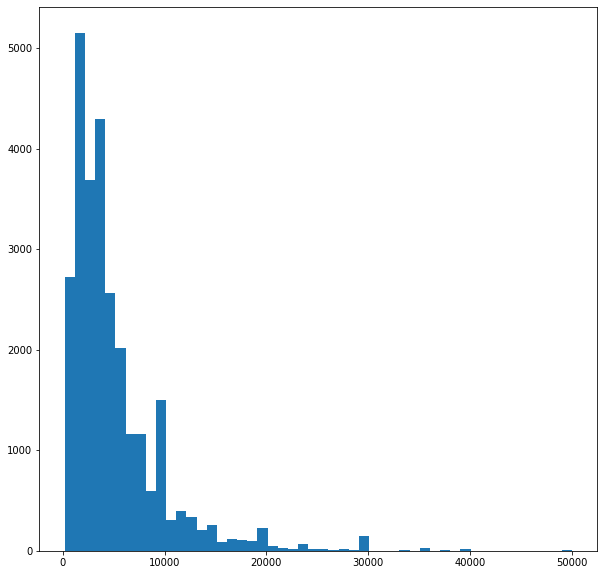

In [82]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['Processing_Fee'],bins=50)
#plt.yscale('log')
#plt.xscale('log')

In [83]:
#zmienna EMI_Loan_Submitted
x['EMI_Loan_Submitted'].value_counts()

3716.36     288
7948.17     252
5089.58     240
5298.78     229
8742.98     218
           ... 
12558.05      1
4530.63       1
46168.22      1
1674.50       1
11463.79      1
Name: EMI_Loan_Submitted, Length: 4530, dtype: int64

In [84]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['EMI_Loan_Submitted'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 68.13835899793152


In [85]:
#statystyki dla zmiennej 
x['EMI_Loan_Submitted'].describe()

count     27726.000000
mean      10999.528377
std        7512.323050
min        1176.410000
25%        6491.600000
50%        9392.970000
75%       12919.040000
max      144748.280000
Name: EMI_Loan_Submitted, dtype: float64

(array([2.737e+03, 4.730e+03, 7.425e+03, 5.652e+03, 2.706e+03, 1.454e+03,
        7.840e+02, 5.970e+02, 4.320e+02, 3.330e+02, 1.720e+02, 2.230e+02,
        1.090e+02, 1.530e+02, 8.000e+01, 3.500e+01, 3.800e+01, 2.200e+01,
        7.000e+00, 9.000e+00, 7.000e+00, 5.000e+00, 9.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1176.41  ,   4047.8474,   6919.2848,   9790.7222,  12662.1596,
         15533.597 ,  18405.0344,  21276.4718,  24147.9092,  27019.3466,
         29890.784 ,  32762.2214,  35633.6588,  38505.0962,  41376.5336,
         44247.971 ,  47119.4084,  49990.8458,  52862.2832,  55733.7206,
         58605.158 ,  61476.5954,  64348.0328,  67219.4702,  70090.9076,
         72

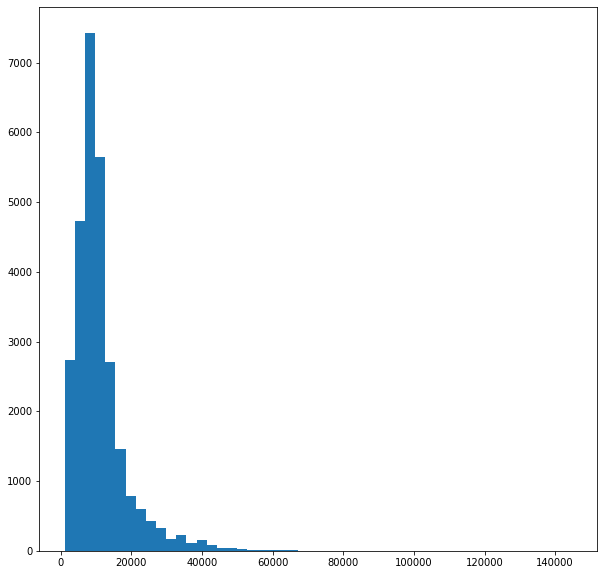

In [86]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['EMI_Loan_Submitted'],bins=50)
#plt.yscale('log')
#plt.xscale('log')

In [87]:
#zmienna Filled_Form
x['Filled_Form'].value_counts()

N    67530
Y    19490
Name: Filled_Form, dtype: int64

In [88]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Filled_Form'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 0.0


In [89]:
#statystyki dla zmiennej 
x['Filled_Form'].describe()

count     87020
unique        2
top           N
freq      67530
Name: Filled_Form, dtype: object

(array([67530.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 19490.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

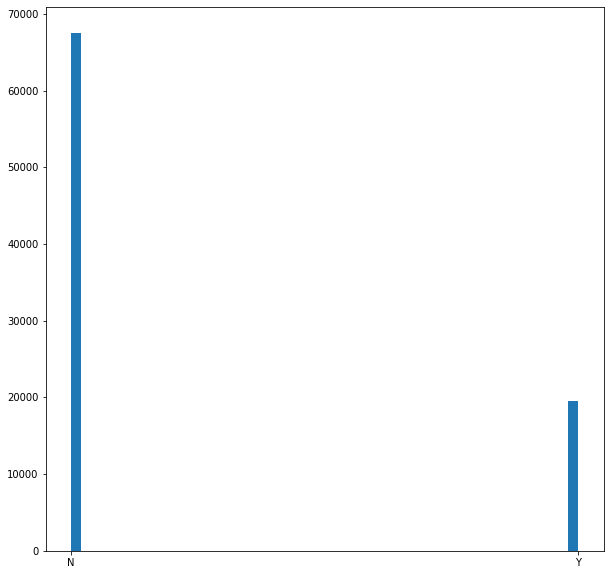

In [90]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['Filled_Form'],bins=50)
#plt.yscale('log')
#plt.xscale('log')


In [91]:
#z jest tak mało ze mozemy wypelnić most frequent

In [92]:
#zmienna Device_Type
x['Device_Type'].value_counts()

Web-browser    64316
Mobile         22704
Name: Device_Type, dtype: int64

In [93]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Device_Type'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 0.0


In [94]:
#statystyki dla zmiennej 
x['Device_Type'].describe()

count           87020
unique              2
top       Web-browser
freq            64316
Name: Device_Type, dtype: object

(array([64316.,     0., 22704.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

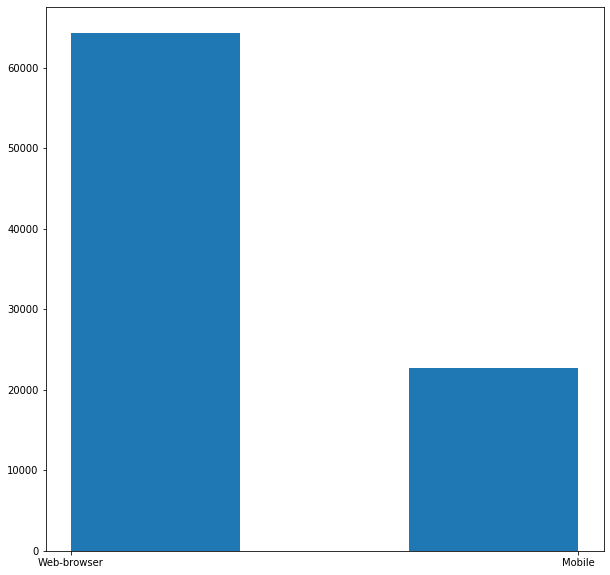

In [95]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['Device_Type'],bins=3)
#plt.yscale('log')
#plt.xscale('log')

In [96]:
#zmienna Var2 - categorical multiple level
x['Var2'].value_counts()

B    37280
G    33032
C    14210
E     1315
D      634
F      544
A        5
Name: Var2, dtype: int64

In [97]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Var2'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 0.0


In [98]:
#statystyki dla zmiennej 
x['Var2'].describe()

count     87020
unique        7
top           B
freq      37280
Name: Var2, dtype: object

(array([3.3032e+04, 3.7280e+04, 1.4210e+04, 0.0000e+00, 1.3150e+03,
        5.4400e+02, 6.3400e+02, 5.0000e+00]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  , 3.75, 4.5 , 5.25, 6.  ]),
 <a list of 8 Patch objects>)

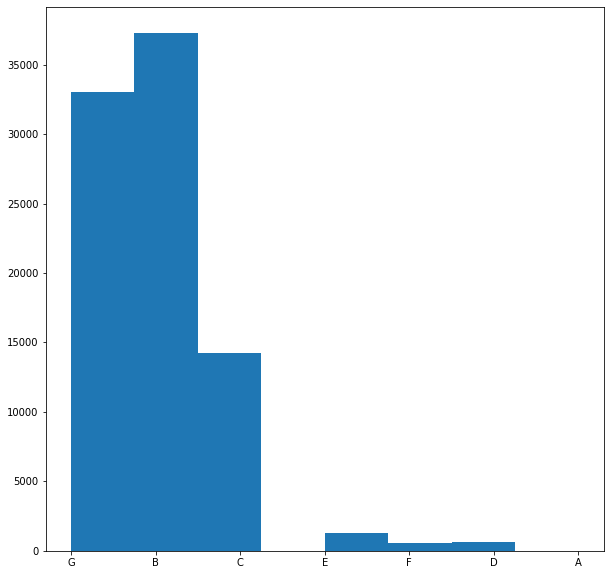

In [99]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['Var2'],bins=8)
#plt.yscale('log')
#plt.xscale('log')

In [100]:
#zmienna Source categorical multiple level
x['Source'].value_counts()

S122    38567
S133    29885
S159     5599
S143     4332
S127     1931
S137     1724
S134     1301
S161      769
S151      720
S157      650
S153      494
S156      308
S144      299
S158      208
S123       73
S141       57
S162       36
S124       24
S160       11
S150       10
S155        4
S139        3
S136        3
S129        3
S138        3
S135        2
S140        1
S154        1
S125        1
S130        1
Name: Source, dtype: int64

In [101]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Source'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 0.0


In [102]:
#statystyki dla zmiennej 
x['Source'].describe()

count     87020
unique       30
top        S122
freq      38567
Name: Source, dtype: object

(array([3.8567e+04, 4.3320e+03, 1.3010e+03, 2.9885e+04, 5.5990e+03,
        7.2000e+02, 1.7240e+03, 1.9310e+03, 2.9900e+02, 7.3000e+01,
        3.0800e+02, 4.9400e+02, 2.4000e+01, 7.6900e+02, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 6.5000e+02, 3.0000e+00, 3.6000e+01,
        5.7000e+01, 2.0800e+02, 1.0000e+00, 3.0000e+00, 3.0000e+00,
        1.0000e+00, 4.0000e+00, 1.1000e+01, 1.0000e+01, 2.0000e+00,
        1.0000e+00]),
 array([ 0.        ,  0.93548387,  1.87096774,  2.80645161,  3.74193548,
         4.67741935,  5.61290323,  6.5483871 ,  7.48387097,  8.41935484,
         9.35483871, 10.29032258, 11.22580645, 12.16129032, 13.09677419,
        14.03225806, 14.96774194, 15.90322581, 16.83870968, 17.77419355,
        18.70967742, 19.64516129, 20.58064516, 21.51612903, 22.4516129 ,
        23.38709677, 24.32258065, 25.25806452, 26.19354839, 27.12903226,
        28.06451613, 29.        ]),
 <a list of 31 Patch objects>)

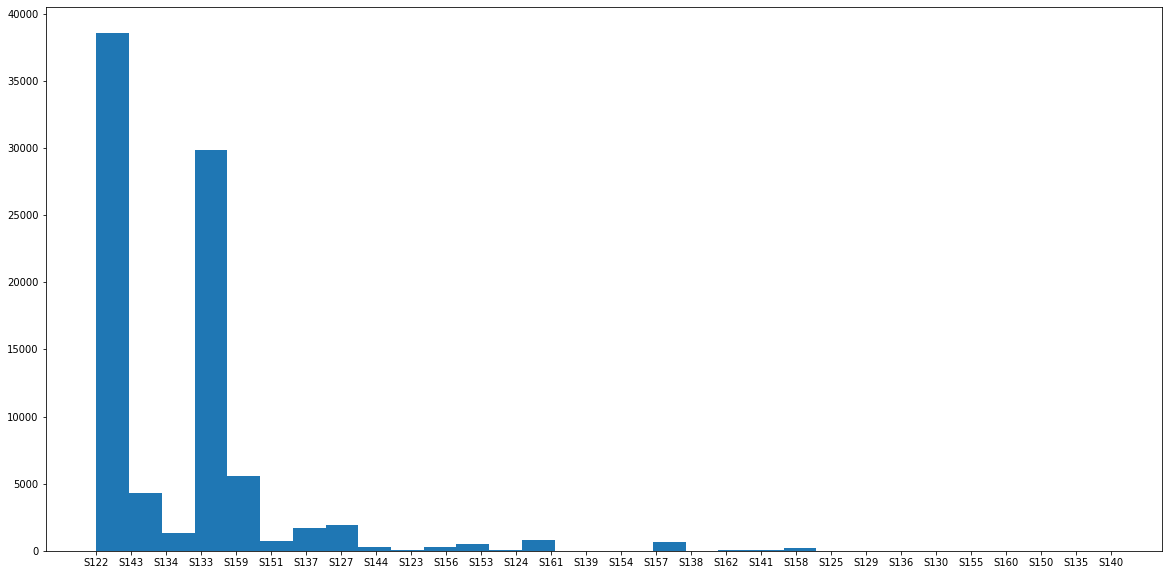

In [103]:
#rozklad zmiennych
plt.figure(figsize=(20,10))
plt.hist(x['Source'],bins=31)
#plt.yscale('log')
#plt.xscale('log')

In [104]:
#zmienna Var4 categorical multiple level
x['Var4'].value_counts()

3    25260
1    23906
5    20266
4     6577
2     5931
0     2546
7     2302
6      232
Name: Var4, dtype: int64

In [105]:
#brakujace wartości
x_total = x.shape[0]
x_missing = x['Var4'].isnull().sum()
print('missing percentage: '+str((x_missing/x_total)*100))

missing percentage: 0.0


In [106]:
#statystyki dla zmiennej 
x['Var4'].describe()

count    87020.000000
mean         2.949805
std          1.697720
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          7.000000
Name: Var4, dtype: float64

(array([ 2546.,     0.,     0.,     0., 23906.,     0.,     0.,     0.,
         5931.,     0.,     0.,     0.,     0., 25260.,     0.,     0.,
            0.,  6577.,     0.,     0.,     0.,     0., 20266.,     0.,
            0.,     0.,   232.,     0.,     0.,     0.,  2302.]),
 array([0.        , 0.22580645, 0.4516129 , 0.67741935, 0.90322581,
        1.12903226, 1.35483871, 1.58064516, 1.80645161, 2.03225806,
        2.25806452, 2.48387097, 2.70967742, 2.93548387, 3.16129032,
        3.38709677, 3.61290323, 3.83870968, 4.06451613, 4.29032258,
        4.51612903, 4.74193548, 4.96774194, 5.19354839, 5.41935484,
        5.64516129, 5.87096774, 6.09677419, 6.32258065, 6.5483871 ,
        6.77419355, 7.        ]),
 <a list of 31 Patch objects>)

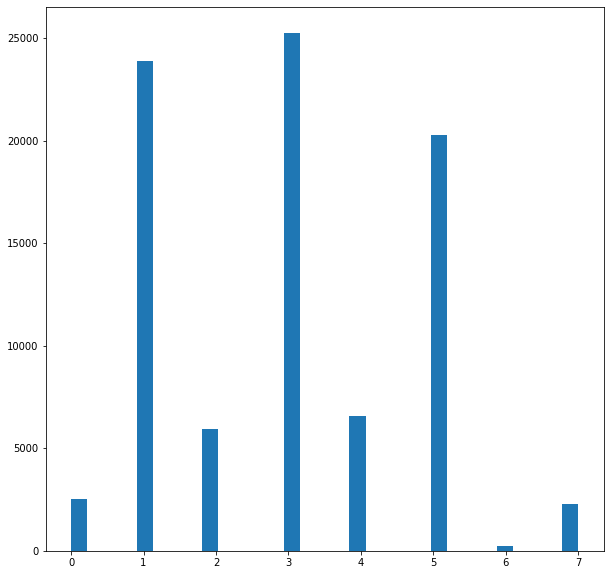

In [107]:
#rozklad zmiennych
plt.figure(figsize=(10,10))
plt.hist(x['Var4'],bins=31)
#plt.yscale('log')
#plt.xscale('log')

In [108]:
import seaborn_qqplot as sqp
from scipy.stats import gamma
sqp.qqplot(x_train,
                   x='Processing_Fee',
                   y=gamma,
                   aspect=2.5,
                   height = 4,
                   display_kws={"identity":True} 
          )
plt.title("QQ Plot")
plt.show()

NameError: name 'x_train' is not defined

In [ ]:
import seaborn_qqplot as sqp
from scipy.stats import gamma
sqp.qqplot(x_train,
                   x='EMI_Loan_Submitted',
                   y=gamma,
                   aspect=2.5,
                   height = 4,
                   display_kws={"identity":True} 
          )
plt.title("QQ Plot")
plt.show()

In [ ]:
import seaborn_qqplot as sqp
from scipy.stats import gamma
sqp.qqplot(x_train,
                   x='Monthly_Income',
                   y=gamma,
                   aspect=2.5,
                   height = 4,
                   display_kws={"identity":True} 
          )
plt.title("QQ Plot")
plt.show()

In [ ]:
# Produce a scatter matrix for each pair of features in the data
from pandas.plotting import scatter_matrix
scatter_matrix(x_train, alpha = 0.3, figsize = (24,20), diagonal = 'kde');



In [ ]:
import seaborn as sns
indices = [52, 70, 77]
percentiles_data = x_train.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]

sns.heatmap(percentiles_samples, annot=True)

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,15))
dcorr = x_train.corr()
sns.heatmap(dcorr, xticklabels=dcorr.columns,yticklabels=dcorr.columns, square=True, annot=True,cbar=False)